<a href="https://colab.research.google.com/github/yahdiindrawan/covid19-forecasting-system/blob/master/Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# univariate bidirectional lstm example
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf

In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

           Confrimed  Death  Recovered  Active
Date                                          
1/22/2020        555     17         28     510
1/23/2020        653     18         30     605
1/24/2020        941     26         36     879
1/25/2020       1434     42         39    1353
1/26/2020       2118     56         52    2010


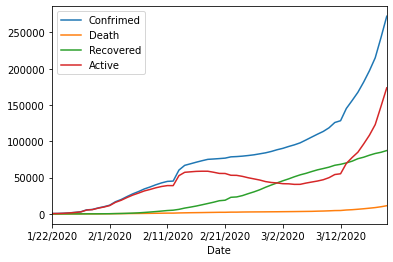

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/KadhReyA/covid19-forecasting-system/master_copy/Dataset/time_series_covid_19.csv', index_col='Date')
print(df.head())
df.plot()

In [0]:
raw_seq = []
for i in range(len(df.Death)):
  raw_seq.append(df.Death[i])

In [6]:
print(raw_seq)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3348, 3460, 3558, 3802, 3988, 4262, 4615, 4720, 5404, 5819, 6440, 7126, 7905, 8733, 9867, 11299]


In [0]:
# choose a number of time steps
n_steps = 3

In [0]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [11]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [0]:
length = len(raw_seq)

In [13]:
x_input = array([raw_seq[length-3], raw_seq[length-2], raw_seq[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

11947.272


In [14]:
last_death = raw_seq[length-1]
predict = yhat
print(last_death)
print(predict)

11299
[[11947.272]]


In [0]:
#Kenaikan kematian tiap hari
kenaikan = []
for i in range(len(df.Death)-1):
  kenaikan.append(df.Death[i+1]-df.Death[i])

In [16]:
print(kenaikan)

[1, 8, 16, 14, 26, 49, 2, 38, 42, 46, 103, 64, 66, 72, 70, 85, 87, 100, 107, 100, 5, 253, 152, 143, 104, 98, 139, 115, 125, 4, 207, 11, 160, 79, 62, 44, 58, 69, 55, 89, 75, 94, 94, 112, 98, 244, 186, 274, 353, 105, 684, 415, 621, 686, 779, 828, 1134, 1432]


In [17]:
kenaikan_prediksi = predict - last_death
print(kenaikan_prediksi)

[[648.27246]]


In [0]:
result_bidirectional = []
for i in range(len(df.Death)-2):
  x_input = array([df.Death[i], df.Death[i+1], df.Death[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result_bidirectional.append(yhat[0][0])

In [20]:
print(result_bidirectional)

[42.127, 56.243233, 83.04692, 129.73888, 132.38026, 169.71678, 212.1753, 266.02554, 345.18393, 425.92548, 502.35315, 538.15106, 613.4394, 694.1721, 782.85364, 880.4792, 984.83746, 1100.2545, 1208.8593, 1269.2784, 1416.2524, 1647.4891, 1807.6915, 1949.8387, 2052.3452, 2183.2673, 2333.5083, 2462.0786, 2540.9478, 2670.774, 2806.9177, 2892.971, 3010.31, 3101.4368, 3166.1704, 3226.9873, 3295.9468, 3365.2466, 3448.038, 3535.6396, 3633.539, 3736.9321, 3853.24, 3970.1782, 4159.2617, 4387.2783, 4647.4634, 4990.3384, 5311.3306, 5707.0415, 6340.8535, 6909.7456, 7692.6577, 8522.569, 9432.251, 10538.866, 11947.272]


In [21]:
# define stacked LSTM model
model_stacked = tf.keras.Sequential()
model_stacked.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_stacked.add(tf.keras.layers.Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')

In [22]:
# fit model
model_stacked.fit(X, y, epochs=200, verbose=0)

In [0]:
result_stacked = []
for i in range(len(df.Death)-2):
  x_input = array([df.Death[i], df.Death[i+1], df.Death[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model_stacked.predict(x_input, verbose=0)
  result_stacked.append(yhat[0][0])

In [28]:
print(len(df.Death[2:]))
print(len(result_bidirectional))
print(len(result_stacked))

57
57
57


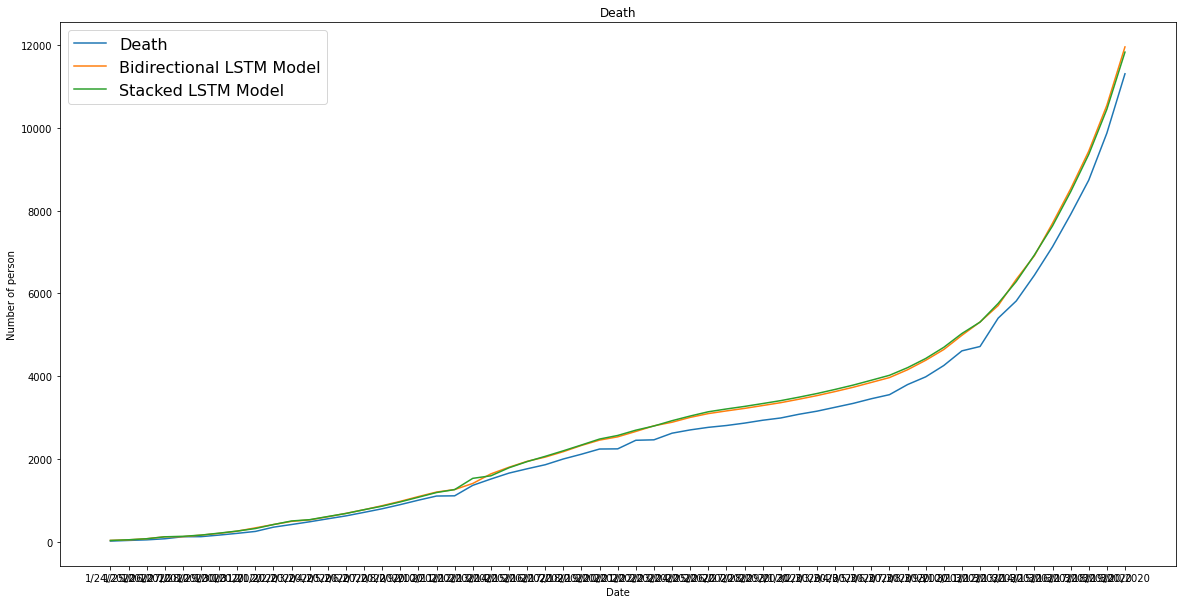

In [29]:
plt.figure(figsize=(20,10))
plt.title('Death')
plt.xlabel('Date')
plt.ylabel('Number of person')
plt.plot(df.Death[2:])
plt.plot(result_bidirectional)
plt.plot(result_stacked)
plt.legend(('Death', 'Bidirectional LSTM Model', 'Stacked LSTM Model'), loc='best',shadow=False, fontsize=16)
plt.show()